# WeatherPy
__________________________________________________________________


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls

In [3]:
# url for API
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid":api_key,
    "units":"imperial"
}
# city container list
city_data = []

In [4]:
#logger
print("Beginning Data Retrieval ")
print("_______________________________")

# counter list
set_counter = 1
record_counter = 1

for city in cities:
    params["q"] = city
    response = requests.get(url, params=params)
    # when looping through, skip if city isn't found
    if response.ok == False:
        print(" City not found.   Skipping...")
        pass
    else:    
        response_json = response.json()
        weather_dict = {
            "City":response_json["name"], 
            "Country":response_json["sys"]["country"],
            "Date":response_json["dt"],
            "Latitude":response_json["coord"]["lat"],
            "Longitude":response_json["coord"]["lon"],
            "Cloudiness":response_json["clouds"]["all"],
            "Humidity":response_json["main"]["humidity"],
            "Max Temp":response_json["main"]["temp_max"],
            "Wind Speed":response_json["wind"]["speed"]
        }
        city_data.append(weather_dict)
        print(f"Processing Record {record_counter} of Set {set_counter} | {weather_dict['City']}")
        record_counter += 1
        
              
              
              
        #utilize the counter
        if record_counter % 50 == 0:
            set_counter += 1
            record_counter = 1
print("_______________________________")
print("Data Retrieval Complete")
print("_______________________________")        

Beginning Data Retrieval 
_______________________________
 City not found.   Skipping...
Processing Record 1 of Set 1 | Hofn
Processing Record 2 of Set 1 | Hermanus
Processing Record 3 of Set 1 | Mayya
Processing Record 4 of Set 1 | Port Alfred
Processing Record 5 of Set 1 | Punta Arenas
Processing Record 6 of Set 1 | Busselton
Processing Record 7 of Set 1 | Chokurdakh
Processing Record 8 of Set 1 | Ploskoye
Processing Record 9 of Set 1 | Antsohihy
Processing Record 10 of Set 1 | Waipawa
Processing Record 11 of Set 1 | Saint-Joseph
Processing Record 12 of Set 1 | Thompson
Processing Record 13 of Set 1 | Ushuaia
Processing Record 14 of Set 1 | Khatanga
Processing Record 15 of Set 1 | Atuona
Processing Record 16 of Set 1 | Bluff
Processing Record 17 of Set 1 | Flagstaff
Processing Record 18 of Set 1 | Luderitz
Processing Record 19 of Set 1 | Albany
Processing Record 20 of Set 1 | Charleston
Processing Record 21 of Set 1 | Bathsheba
 City not found.   Skipping...
Processing Record 22 of S

Processing Record 43 of Set 4 | Coahuayana Viejo
Processing Record 44 of Set 4 | Ghanzi
Processing Record 45 of Set 4 | Mar del Plata
Processing Record 46 of Set 4 | Maceio
Processing Record 47 of Set 4 | Sitka
Processing Record 48 of Set 4 | Novoanninskiy
Processing Record 49 of Set 4 | Rawson
Processing Record 1 of Set 5 | Saint George
 City not found.   Skipping...
Processing Record 2 of Set 5 | Karratha
Processing Record 3 of Set 5 | North Bend
Processing Record 4 of Set 5 | Padang
Processing Record 5 of Set 5 | Avera
Processing Record 6 of Set 5 | Banda Aceh
Processing Record 7 of Set 5 | Kirakira
Processing Record 8 of Set 5 | Ludhiana
Processing Record 9 of Set 5 | Cabinda
Processing Record 10 of Set 5 | Teguise
Processing Record 11 of Set 5 | George Town
Processing Record 12 of Set 5 | Mariental
Processing Record 13 of Set 5 | Puerto Ayora
Processing Record 14 of Set 5 | Preobrazheniye
Processing Record 15 of Set 5 | Eureka
Processing Record 16 of Set 5 | Vrede
Processing Recor

Processing Record 32 of Set 8 | Marzuq
Processing Record 33 of Set 8 | Srednekolymsk
Processing Record 34 of Set 8 | Tambo
 City not found.   Skipping...
Processing Record 35 of Set 8 | Kpalime
 City not found.   Skipping...
Processing Record 36 of Set 8 | Bowen
Processing Record 37 of Set 8 | Puerto Leguizamo
Processing Record 38 of Set 8 | 'Ewa Beach
Processing Record 39 of Set 8 | Miles City
Processing Record 40 of Set 8 | Kununurra
Processing Record 41 of Set 8 | Nome
Processing Record 42 of Set 8 | Qui Nhon
Processing Record 43 of Set 8 | Lamu
Processing Record 44 of Set 8 | Vestmanna
Processing Record 45 of Set 8 | Zima
Processing Record 46 of Set 8 | Biritiba-Mirim
Processing Record 47 of Set 8 | Bardiyah
Processing Record 48 of Set 8 | Ukhta
Processing Record 49 of Set 8 | Kidal
Processing Record 1 of Set 9 | Ayacucho
 City not found.   Skipping...
Processing Record 2 of Set 9 | Chetwayi
Processing Record 3 of Set 9 | Kirkwall
Processing Record 4 of Set 9 | Redmond
Processing R

### Convert Raw Data to DataFrame

In [5]:
# pandas dataframe
city_pd = pd.DataFrame(city_data)

lat = city_pd["Latitude"]
maxtemp = city_pd["Max Temp"]
hum = city_pd["Humidity"]
winds = city_pd["Wind Speed"]
clouds = city_pd["Cloudiness"]


In [6]:
# export
city_pd.to_csv(output_data_file, index_label="City_ID")

city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Hofn,86,IS,1579151560,89,64.25,-15.21,39.45,13.35
1,Hermanus,8,ZA,1579151560,82,-34.42,19.23,75.99,7.00
2,Mayya,75,RU,1579151560,74,61.73,130.28,-23.80,2.24
3,Port Alfred,2,ZA,1579151560,94,-33.59,26.89,75.00,5.06
4,Punta Arenas,20,CL,1579151561,60,-53.15,-70.92,42.80,13.87


### Plotting the Data

#### Latitude vs. Temperature Plot

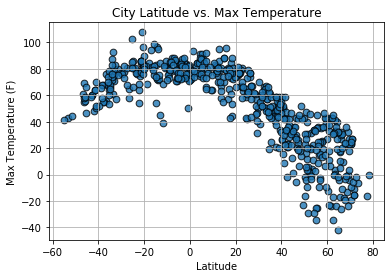

In [7]:
plt.scatter(lat, maxtemp, marker="o", edgecolor="black", s= 45, alpha=0.8)
plt.title("City Latitude vs. Max Temperature");
plt.xlabel("Latitude");
plt.ylabel("Max Temperature (F)");
plt.grid();
plt.savefig("output_data/Lat_vs_Temp.png");
plt.show()

#### Latitude vs. Humidity Plot

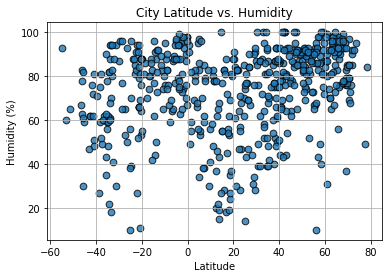

In [8]:
plt.scatter(lat, hum, marker="o", edgecolor="black", s= 45, 
            alpha=0.8)
plt.title("City Latitude vs. Humidity");
plt.xlabel("Latitude");
plt.ylabel("Humidity (%)");
plt.grid();
plt.savefig("output_data/Lat_vs_Humidity.png");
plt.show()

#### Latitude vs. Cloudiness Plot

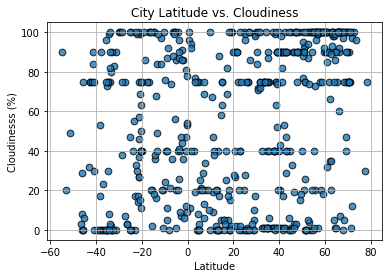

In [11]:
plt.scatter(lat, clouds, marker="o", edgecolor="black", s= 45, 
            alpha=0.8)
plt.title("City Latitude vs. Cloudiness");
plt.xlabel("Latitude");
plt.ylabel("Cloudinesss (%)");
plt.grid();
plt.savefig("output_data/Lat_vs_Cloudiness.png");
plt.show()

#### Latitude vs. Wind Speed Plot